# Clustering Facebook Live Sellers in Thailand

Petunjuk Penggunaan:
1. Pada Menu Bar Jupyter, tekan menu Run.
2. Tekan sub menu Restart Kernel and Run All Cells.

### Mengimpor Library Awal

In [1]:
# Import Library NumPy
import numpy as np
# Import Library Pandas
import pandas as pd
# Import Matplotlib
import matplotlib.pyplot as plt
# Import Seaborn
import seaborn as sns

### Memasukkan Dataset

In [ ]:
# Membaca file dan disimpan di df (DataFrame)
df = pd.read_csv('Facebook_Live_Sellers_in_Thailand.csv')
# Menampilkan df
df

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,7046,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,NaN,NaN,NaN,NaN
7046,7047,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,NaN,NaN,NaN,NaN
7047,7048,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN
7048,7049,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,NaN,NaN,NaN,NaN


### Exploratory Data Analysis (EDA)

In [3]:
# Melihat ukuran dataset
df.shape

(7050, 16)

In [4]:
# Melihat data 5 awal dataset
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [5]:
# Menampilkan ringkasan dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   int64  
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(10), object(2)
memory

In [6]:
# Mengecek nilai data yang hilang (missing)
df.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

In [7]:
# Hapus kolom yang tidak diperlukan
df.drop(['Column1', 'Column2', 'Column3', 'Column4'], axis=1, inplace=True)

In [8]:
# Menampilkan kembali ringkasan dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         7050 non-null   int64 
 1   status_type       7050 non-null   object
 2   status_published  7050 non-null   object
 3   num_reactions     7050 non-null   int64 
 4   num_comments      7050 non-null   int64 
 5   num_shares        7050 non-null   int64 
 6   num_likes         7050 non-null   int64 
 7   num_loves         7050 non-null   int64 
 8   num_wows          7050 non-null   int64 
 9   num_hahas         7050 non-null   int64 
 10  num_sads          7050 non-null   int64 
 11  num_angrys        7050 non-null   int64 
dtypes: int64(10), object(2)
memory usage: 661.1+ KB


In [9]:
# Menampilkan ringkasan statistik
df.describe()

,status_id,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,3525.500000,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191
std,2035.304031,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1763.250000,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3525.500000,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5287.750000,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000
max,7050.000000,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


In [10]:
# Melihat label di variabel status_id
df['status_id'].unique()

array([   1,    2,    3, ..., 7048, 7049, 7050], dtype=int64)

In [11]:
# Melihat jumlah jenis variabel status_id
len(df['status_id'].unique())

7050

In [12]:
# Melihat label di variabel status_published
df['status_published'].unique()

array(['4/22/2018 6:00', '4/21/2018 22:45', '4/21/2018 6:17', ...,
       '9/21/2016 23:03', '9/20/2016 0:43', '9/10/2016 10:30'],
      dtype=object)

In [13]:
# Melihat jumlah jenis variabel di status_published
len(df['status_published'].unique())

6913

In [14]:
# Melihat label di variabel status_type
df['status_type'].unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

In [15]:
# Melihat jumlah jenis variabel di status_type
len(df['status_type'].unique())

4

In [16]:
# Menghapus status_id dan status_published
df.drop(['status_id', 'status_published'], axis=1, inplace=True)

In [17]:
# Menampilkan kembali ringkasan dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   status_type    7050 non-null   object
 1   num_reactions  7050 non-null   int64 
 2   num_comments   7050 non-null   int64 
 3   num_shares     7050 non-null   int64 
 4   num_likes      7050 non-null   int64 
 5   num_loves      7050 non-null   int64 
 6   num_wows       7050 non-null   int64 
 7   num_hahas      7050 non-null   int64 
 8   num_sads       7050 non-null   int64 
 9   num_angrys     7050 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 550.9+ KB


In [18]:
# Melihat kembali data 5 awal dataset
df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0


### Menentukan Feature dan Target

In [19]:
# Feature
X = df
# Target
y = df['status_type']

### Data preprocessing

In [20]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder
# Membuat suatu variabel untuk fungsi LabelEncoder()
le = LabelEncoder()
# Meminta variabel status_type pada feature untuk menggunakan metode fit_transform()
X['status_type'] = le.fit_transform(X['status_type'])
# Meminta target agar variabel le menggunakan metode transform()
y = le.transform(y)

In [21]:
# Menampilkan ringkasan feature
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   status_type    7050 non-null   int32
 1   num_reactions  7050 non-null   int64
 2   num_comments   7050 non-null   int64
 3   num_shares     7050 non-null   int64
 4   num_likes      7050 non-null   int64
 5   num_loves      7050 non-null   int64
 6   num_wows       7050 non-null   int64
 7   num_hahas      7050 non-null   int64
 8   num_sads       7050 non-null   int64
 9   num_angrys     7050 non-null   int64
dtypes: int32(1), int64(9)
memory usage: 523.4 KB


In [22]:
# Menampilkan 5 data awal feature
X.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0


### Feature Scalling

In [23]:
# Membuat suatu variabel untuk menyimpan daftar columns dari feature
cols = X.columns

In [24]:
# Import MinMaxScaller
from sklearn.preprocessing import MinMaxScaler
# Membuat suatu variabel untuk fungsi MinMaxScaler()
mms = MinMaxScaler()
# Meminta feature agar variabel ms menggunakan metode fit_transform()
X = mms.fit_transform(X)

In [25]:
# Meminta feature agar membuat DataFrame baru dengan data feature sebagai nilainya dan nama kolom-kolomnya
X = pd.DataFrame(X, columns=[cols])

In [26]:
# Menampilkan 5 data awal feature
X.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1.000000,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,0.333333,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,1.000000,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,0.333333,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,0.333333,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0


### Clustering

#### Model K-Means dengan Dua Cluster

In [27]:
# Import KMeans
from sklearn.cluster import KMeans
# Meminta Model K-Means dengan dua cluster
model = KMeans(n_clusters=2, random_state=0)
# Meminta model menggunakan metode fit()
model.fit(X)

KMeans(n_clusters=2, random_state=0)

#### Parameter Model

In [28]:
# Mengembalikan array dengan baris yang mewakili pusat-pusat cluster 
model.cluster_centers_

array([[9.54921576e-01, 6.46330441e-02, 2.67028654e-02, 2.93171709e-02,
        5.71231462e-02, 4.71007076e-02, 8.18581889e-03, 9.65207685e-03,
        8.04219428e-03, 7.19501847e-03],
       [3.28506857e-01, 3.90710874e-02, 7.54854864e-04, 7.53667113e-04,
        3.85438884e-02, 2.17448568e-03, 2.43721364e-03, 1.20039760e-03,
        2.75348016e-03, 1.45313276e-03]])

In [29]:
# Mengembalikan nilai inertia dari model yang telah difit
model.inertia_

237.75726404419646

#### Kualitas Model

In [30]:
# Membuat suatu variabel untuk label cluster dari model
labels = model.labels_
# Membuat suatu variabel untuk menampilkan banyaknya sampel yang diberi label dengan benar
correct_labels = sum(y == labels)
# Mencetak jumlah sampel yang diberi label dengan benar dari total data feature
print("Hasil: %d dari %d sampel diberi label dengan benar." % (correct_labels, y.size))

Hasil: 4288 dari 7050 sampel diberi label dengan benar.


In [31]:
# Mencetak skor akurasi jumlah sampel yang diberi label dengan benar dari total data feature
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Accuracy score: 0.61


### Metode Elbow

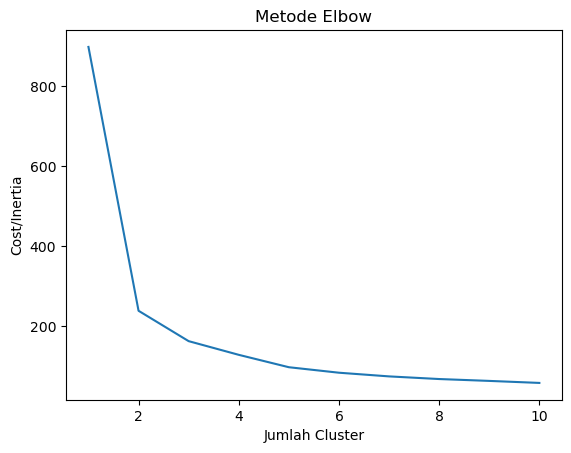

In [32]:
# Import KMeans
from sklearn.cluster import KMeans
# Membuat list kosong pada suatu variabel
cost = []
# Melakukan perulangan dari 1 sampai 10 untuk mencoba jumlah cluster yang berbeda-beda
for i in range(1, 11):
    # Membuat suatu variabel dengan n_cluster = i (jumlah klaster), inisialisasi pusat cluster, maksimum iterasi, menjalankan algoritma sebanyak 10 kali dari pusat cluster yang berbeda
    model = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    # Meminta model menggunakan metode fit()
    model.fit(X)
    # Menambahkan nilai inertia ke dalam list cs
    cost.append(model.inertia_)
# Memplot nilai di list terhadap jumlah cluster dari 1 sampai 10
plt.plot(range(1, 11), cost)
# Memberi judul 'Metode Elbow'
plt.title('Metode Elbow')
# Memberi label sumbu x 'Jumlah cluster'
plt.xlabel('Jumlah Cluster')
# Memberi label sumbu y 'Cost/Inertia'
plt.ylabel('Cost/Inertia')
# Menampilkan plot
plt.show()

### Model K-Means dengan Dua Cluster

In [33]:
# Import KMeans
from sklearn.cluster import KMeans
# Meminta Model K-Means dengan dua cluster
model = KMeans(n_clusters=2, random_state=0)
# Meminta model menggunakan metode fit()
model.fit(X)
# Membuat suatu variabel untuk label cluster dari model
labels = model.labels_
# Membuat suatu variabel untuk menampilkan banyaknya sampel yang diberi label dengan benar
correct_labels = sum(y == labels)
# Mencetak jumlah sampel yang diberi label dengan benar dari total data feature
print("Hasil: %d dari %d sampel diberi label dengan benar." % (correct_labels, y.size))
# Mencetak skor akurasi jumlah sampel yang diberi label dengan benar dari total data feature
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Hasil: 4288 dari 7050 sampel diberi label dengan benar.
Accuracy score: 0.61


### Model K-Means dengan Tiga Cluster

In [34]:
# Meminta Model K-Means dengan tiga cluster
model = KMeans(n_clusters=3, random_state=0)
# Meminta model menggunakan metode fit()
model.fit(X)
# Membuat suatu variabel untuk label cluster dari model
labels = model.labels_
# Membuat suatu variabel untuk menampilkan banyaknya sampel yang diberi label dengan benar
correct_labels = sum(y == labels)
# Mencetak jumlah sampel yang diberi label dengan benar dari total data feature
print("Hasil: %d dari %d sampel diberi label dengan benar." % (correct_labels, y.size))
# Mencetak skor akurasi jumlah sampel yang diberi label dengan benar dari total data feature
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Hasil: 4066 dari 7050 sampel diberi label dengan benar.
Accuracy score: 0.58


### Model K-Means dengan Empat Cluster

In [35]:
# Meminta Model K-Means dengan empat cluster
model = KMeans(n_clusters=4, random_state=0)
# Meminta model menggunakan metode fit()
model.fit(X)
# Membuat suatu variabel untuk label cluster dari model
labels = model.labels_
# Membuat suatu variabel untuk menampilkan banyaknya sampel yang diberi label dengan benar
correct_labels = sum(y == labels)
# Mencetak jumlah sampel yang diberi label dengan benar dari total data feature
print("Hasil: %d dari %d sampel diberi label dengan benar." % (correct_labels, y.size))
# Mencetak skor akurasi jumlah sampel yang diberi label dengan benar dari total data feature
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Hasil: 4112 dari 7050 sampel diberi label dengan benar.
Accuracy score: 0.58
